     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.5 MB/s eta 0:00:00
/kaggle/input/ue21cs342aa2/sample_submission.csv
/kaggle/input/ue21cs342aa2/train.csv
/kaggle/input/ue21cs342aa2/test.csv


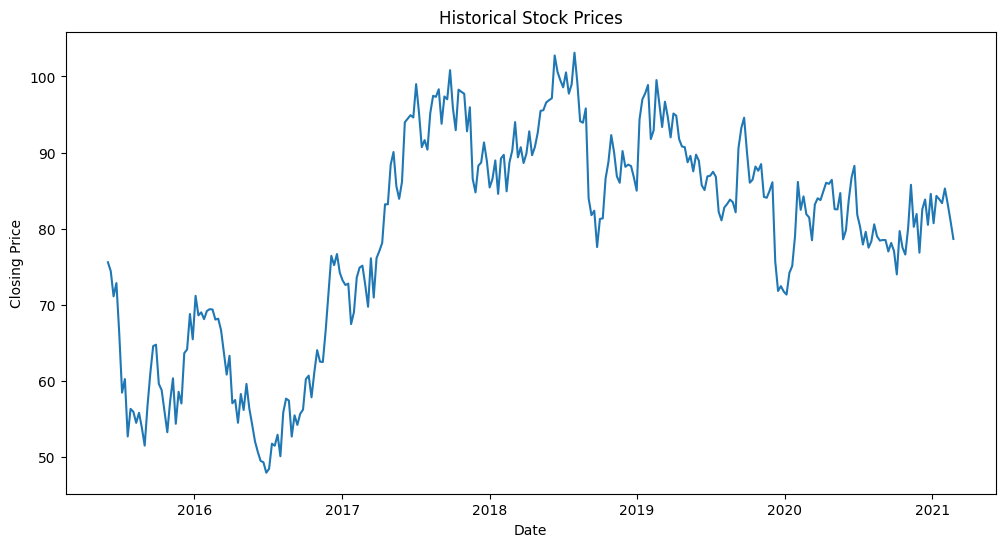

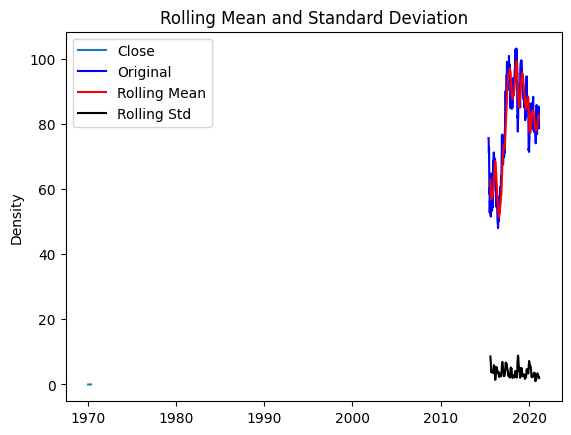

Results of dickey fuller test
Test Statistics                 -1.808006
p-value                          0.376494
No. of lags used                 1.000000
Number of observations used    298.000000
critical value (1%)             -3.452486
critical value (5%)             -2.871288
critical value (10%)            -2.571964
dtype: float64


<Figure size 640x480 with 0 Axes>

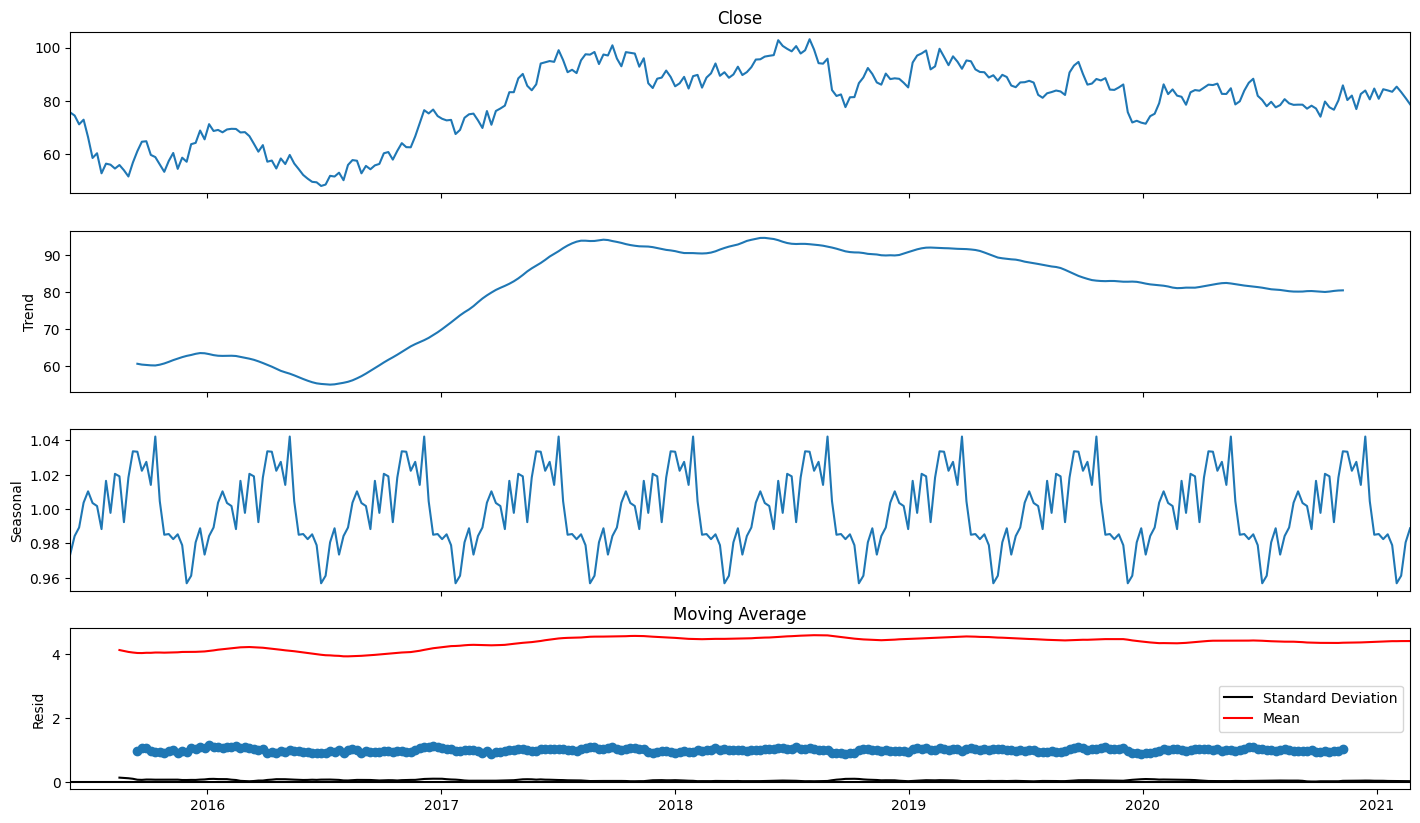

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-656.165, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-658.910, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-658.339, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-658.074, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-657.629, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-657.781, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-656.111, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-660.778, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-659.518, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-659.625, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-660.205, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-657.560, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.281 seconds
                               SARIMAX Results                                
Dep. Vari

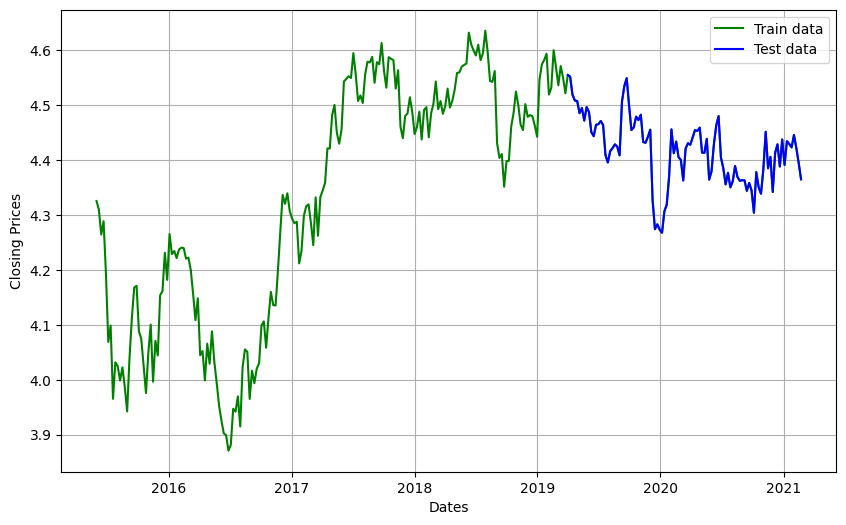

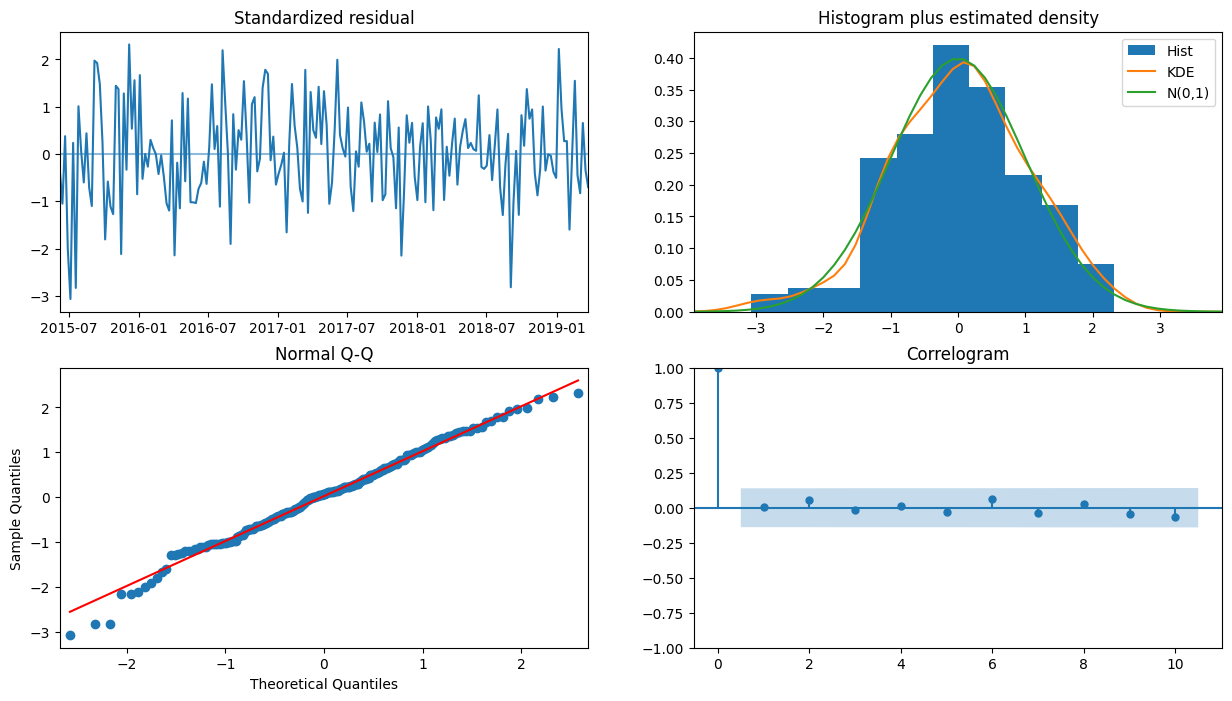

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  200
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 332.813
Date:                Wed, 01 Nov 2023   AIC                           -659.625
Time:                        14:58:30   BIC                           -649.745
Sample:                    06-01-2015   HQIC                          -655.626
                         - 03-25-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5151      0.364     -1.416      0.157      -1.228       0.198
ma.L1          0.3724      0.393      0.947      0.344      -0.398       1.143
sigma2         0.0021      0.000     10.225      0.0

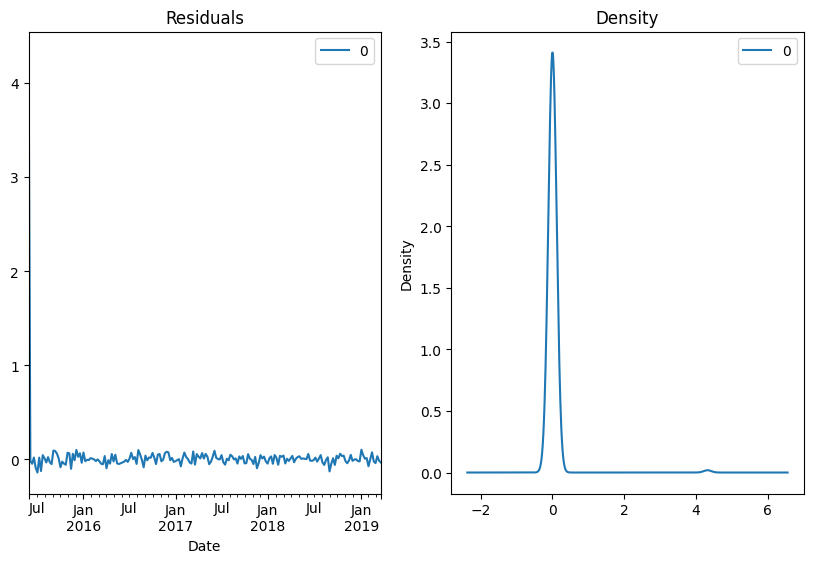

In [1]:
!pip install pmdarima
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error


import math

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



data = pd.read_csv('/kaggle/input/ue21cs342aa2/train.csv', sep=',', index_col='Date', parse_dates=['Date'], date_parser=pd.to_datetime).fillna(0)
data.head()


test_data = pd.read_csv("/kaggle/input/ue21cs342aa2/test.csv")
test_data.head()


!pip install pmdarima


# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

df_close = data['Close']
df_close.plot(kind='kde')



# Check for stationarity and perform differencing if necessary
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)



#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_close, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)



#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

#split data into train and training set
train_size = int(len(df_log) * 0.9)
train_data, test_data = df_log[:-100], df_log[-100:]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()



model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()


from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(1,1,1))  
model_fit = model.fit()  
print(model_fit.summary())


# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
# summary stats of residuals
print(residuals.describe())
plt.show()
                

# Make predictions for the test set
train_data = train_data.iloc[:100]
start = len(train_data)
end = start + len(test_data) - 1
close_predictions = model_fit.predict(start=start, end=end, typ='levels')
strategy = []
for prediction in close_predictions:
    if prediction > 0:
        strategy.append('Buy')
    elif prediction < 0:
        strategy.append('Sell')
    else:
        strategy.append('Hold')
# Create a DataFrame for the submission file
submission_df = pd.DataFrame({
    'id': range(len(test_data)),  # Use the index of test_data as 'id'
    'Date': test_data.index,
    'Close': close_predictions,
    'Strategy': strategy
})
# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)